In [1]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt

from keras.datasets import cifar100
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from livelossplot import PlotLossesKeras

C:\Users\DLP\AppData\Local\Temp\ipykernel_15912\896595407.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

# Visualize data shape

In [3]:
print("Train-set data shape = ", X_train.shape)
print("Train-set labels shape = ", y_train.shape)

print("Test-set data shape = ", X_test.shape)
print("Test-set data shape = ", y_test.shape)

nr_classes = len(np.unique(y_test))
print("Show Classes = ", np.unique(y_test))
print("Show Nr. of classes = ", nr_classes)

Train-set data shape =  (50000, 32, 32, 3)
Train-set labels shape =  (50000, 1)
Test-set data shape =  (10000, 32, 32, 3)
Test-set data shape =  (10000, 1)
Show Classes =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Show Nr. of classes =  100


# Display one of the samples

In [4]:
#pick a sample
image_idx=int(X_train.shape[0]/2)
picture = X_train[image_idx]
print(picture.shape)
#picture = picture.reshape(28,28) 

(32, 32, 3)


In [5]:
# Display the sample label
lbl = y_train[image_idx]
print(f"Sample {image_idx}, label = {y_train[image_idx]}")

Sample 25000, label = [3]


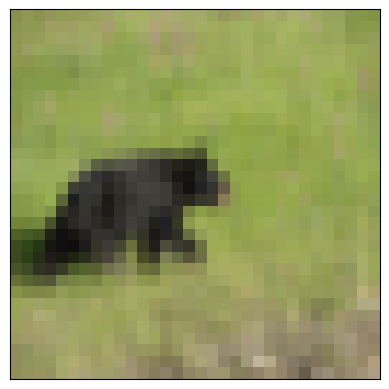

In [6]:
# Display the sample image
plt.imshow(picture)
plt.xticks([])
plt.yticks([])
plt.show() 

# Convert the labels to categorical

In [7]:
y_train = to_categorical(y_train, nr_classes)
y_test = to_categorical(y_test, nr_classes)

# Normalize the data between 0 and 1 (colors are coded from 0 to 255 so just divide by 255)

In [8]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

### Define the CNN Architecture

In [9]:
model = Sequential()

# CNN
# Convolutional Layer
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

# Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

# # Convolutional Layer
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))

#add flattening layer
model.add(Flatten())


# ANN
# Dense Layer
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))

# Dense Layer
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))

# Dense Layer
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))

# Dense Layer
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))

# Output Layer
model.add(Dense(units=100, activation='softmax'))

# Compile CNN

Use sparse categorical crossentropy when your classes are mutually exclusive (e.g. when each sample belongs exactly to one class) and categorical crossentropy when one sample can have multiple classes or labels are soft probabilities (like [0.5, 0.3, 0.2]).

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 15, 15, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          

# Train the CNN

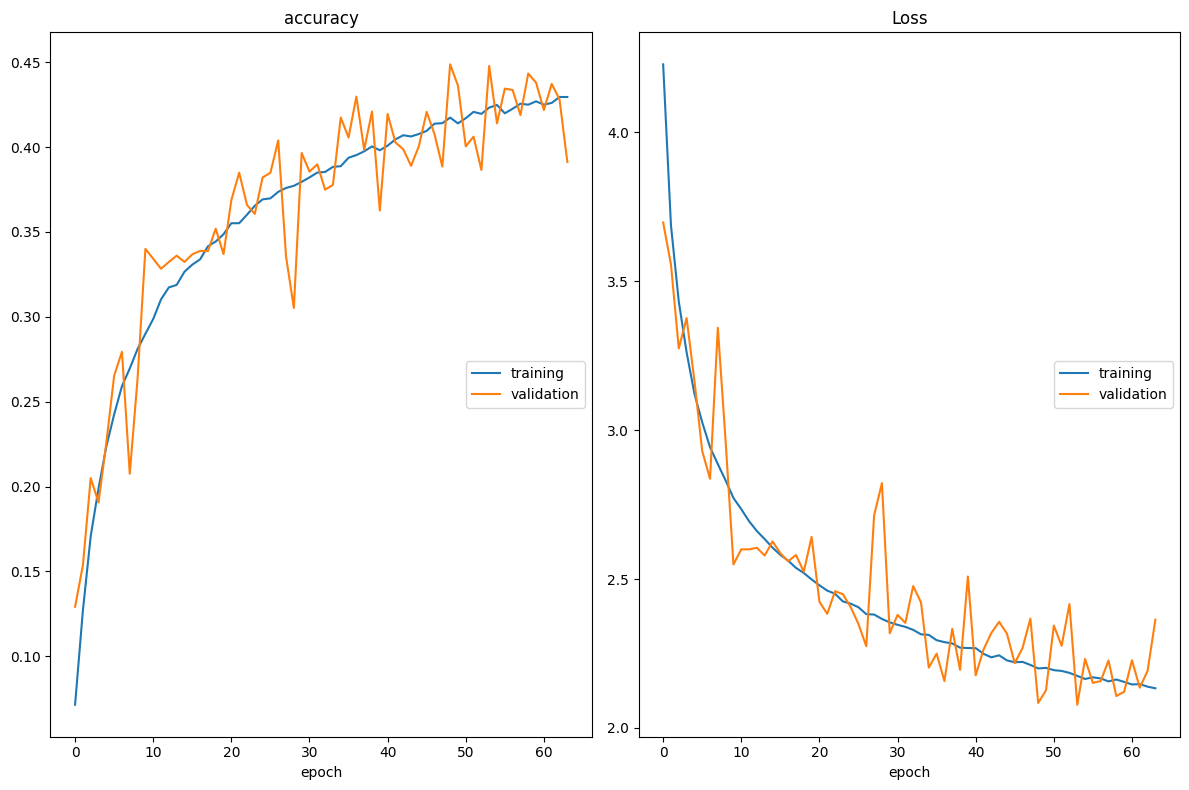

accuracy
	training         	 (min:    0.072, max:    0.429, cur:    0.429)
	validation       	 (min:    0.129, max:    0.449, cur:    0.391)
Loss
	training         	 (min:    2.133, max:    4.229, cur:    2.133)
	validation       	 (min:    2.078, max:    3.697, cur:    2.363)


In [ ]:
model.fit(X_train, y_train,
          epochs=100,
          batch_size=32,
          validation_data=(X_test, y_test),
          callbacks=[PlotLossesKeras()],
          verbose=0)

In [ ]:
# get the model's performance
loss, accuracy = model.evaluate(X_test,y_test)

In [ ]:
print(f"Loss (sparse_categorical_crossentropy) = {loss}")
print(f"Accuracy = {accuracy}")